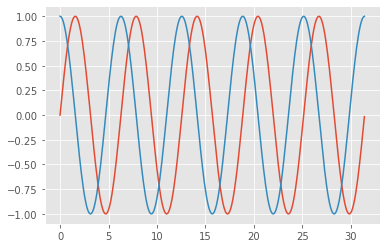

In [2]:
#plotting a basic sin and cos curve

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#experimenting

x = np.arange(0 , 10*np.pi , 0.1)

y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x , y1)
plt.plot(x , y2)
plt.show()

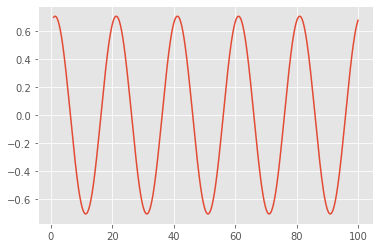

In [3]:
'''
simple harmonic motion with a spring of spring constant k and 

'''

A = 1 #amplitude in m 
B = 2
t = np.arange(1,100, 0.1) #time series in sec
k = 0.1 #spring constant N/m
m = 1 #mass in kg
w = np.sqrt(k/m) #angular frequency 1/s w = root(k/m)

x = A*np.sin(w*t) + B*np.cos(w*t)  #displacement in m

v = w*x

plt.plot(t , v)

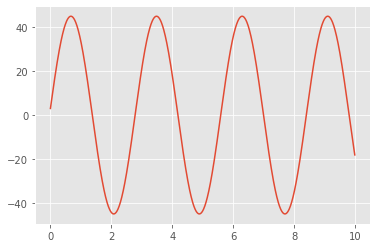

In [4]:
#verlet algorithm test single spring mass


x = [0,1] #displacement array in m
x_current = 1
x_prev = 0
i = 2
t_s = np.arange(0,10,0.01) #time series
t = 0 #initial time in s
dt = 0.01 
m = 1 #mass kg
k = 5 #spring constant N/m

while t <= 10:
    
    t+=dt
    F = -1*k*x_current
    x.append(2*x_current - x_prev + dt*dt*F/m)
    x_prev = x_current
    x_current = x[i]
    i+=1

x = np.array(x)

plt.plot(t_s , x[3:])
plt.show()
    


In [5]:
'''
verlet integration:

r(t+dt) = 2r(t)-r(t-dt) + dt^2*F/m

'''
import numpy as np
import matplotlib.pyplot as plt

class HarmonicOscillator():
    
    def __init__(self , k , m , dt , t):
        
        self.K = k #spring constant N/m
        self.m = m #mass of the particle KG
        self.dt = 0.01 #s
        self.x = [0,1] #displacement from initial pos in m
        self.t_s = np.arange(0,t,dt) #time series array in s
        self.t_max = t #final time in s
        self.t = 0 #initial time in s 
        self.v = [0,0] #velocity array in m/s 
        self.x_current = 1 #current displacement 
        self.x_prev = 0 #previous displacement 
        
    def VerletAlgorithm(self):
        
        i = 2
        
        while self.t <= self.t_max:
            
            self.t+=self.dt
            F = -1*self.x_current*self.K # F = -k*x , F ∝ -x
            self.x.append(2*self.x_current - self.x_prev + (self.dt**2)*F/self.m)  #r(t+dt) = 2r(t)-r(t-dt) + dt^2*F/m
            self.x_prev = self.x_current #prev x becomes current
            self.x_current = self.x[i] #current x becomes the one just calculated
            #self.v.append(v[i-1] + dt*F/m) #dv = a*dt , v' = v + dv , v' = v + a*dt
            i+=1 
        
        self.x = np.array(self.x)
        self.v = np.array(self.v)
        
    def Plot(self):
        
        plt.style.use('ggplot')
        
        fig , axs = plt.subplots(2)
        
        axs[0].plot(self.t_s , self.x[3:])
        axs[0].set_title("displacement over time")
        #axs[1].plot(self.t_s , self.v[1:])
        #axs[1].set_title("velocity over time")
    
        plt.show()
        
        
        
        

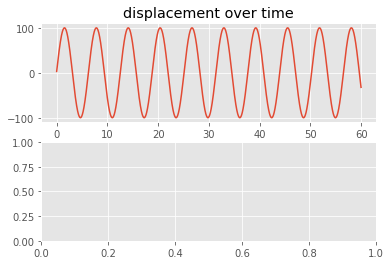

In [6]:
o = HarmonicOscillator(1 , 1 ,0.01, 60) # k = 1 N/m , m = 1Kg ,dt = 0.01s , t_final = 60 seconds
o.VerletAlgorithm()
o.Plot()

<h3>Task 1</h3>
<br>
<p>

 plot the signal 
 
    h(t) = a*cos(2*π*f*t + φ)
 
    
</p>

Text(0, 0.5, 'h')

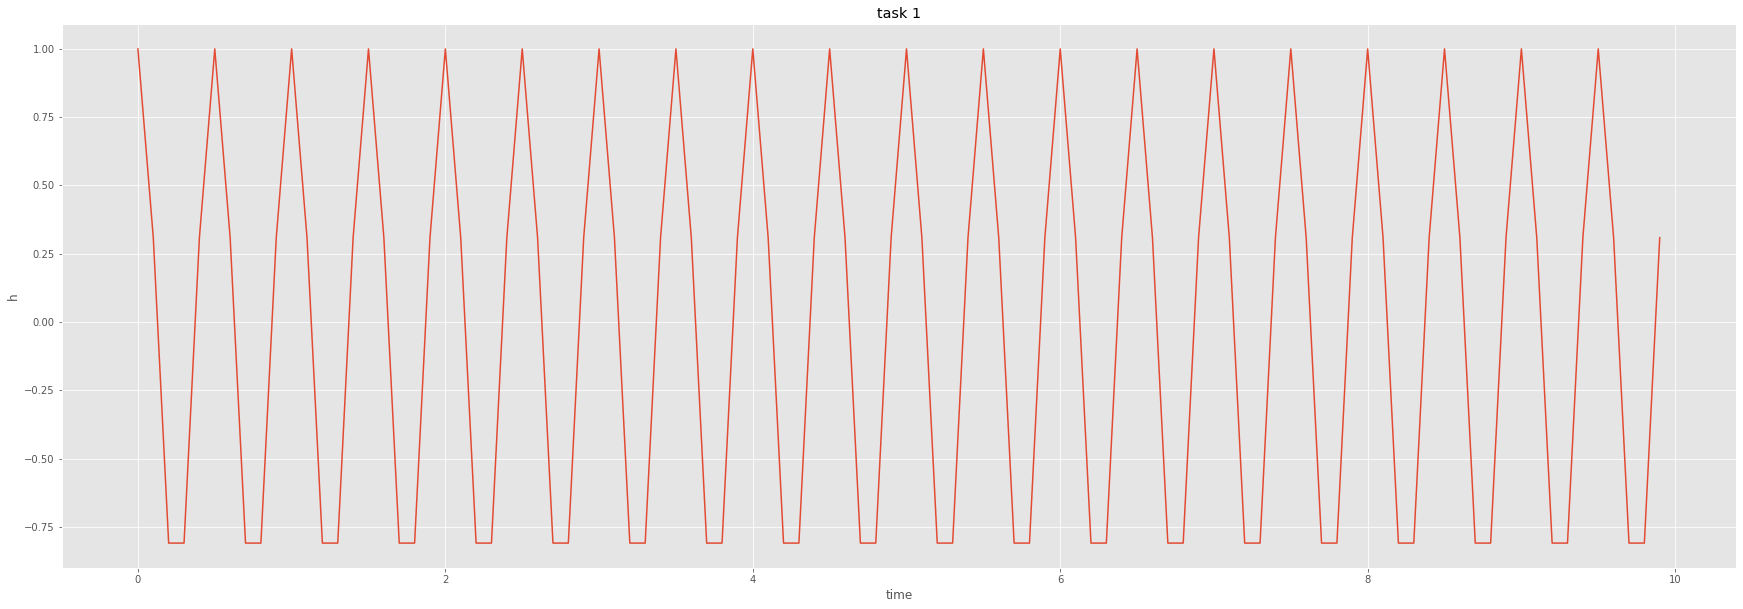

In [7]:
#Task 1 signal 
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

t = np.arange(0,10,0.1) #time series
dt = 0.1 #dt s 
a = 1 #amplitude in m
phi = 0 #phase angle rad
f = 2 #frequency Hz
h = a*np.cos(2*np.pi*f*t + phi)

plt.figure(figsize = (30,10))
plt.title("task 1")
plt.plot(t , h)
plt.xlabel("time")
plt.ylabel("h")


<h3>coupled harmonic oscillator with verlet algorithm , 3 particles 4 springs</h3>
<br>
<br>
<p>
<ul>
    <li>3 different arrays for displacement of each particle - x1 , x2 , x3</li>
    <li>for each particle 1 variable holding current displacement</li>
    <li>each particle has an array holding the velocity and a variable holding current velocity </li>
    <li>spring constant is the same for all 4 springs</li>
<li>mass is the same for all particles</li>
    <li>i = 1 , 2 , 3 for each particle</li>
 <li> one array each for ke , pe , te <li>
   
</ul>
</p>
<br>
<br>
q<sub>i</sub>(t+dt) = q<sub>i</sub>(t) + v<sub>i</sub>(t+ dt/2)*dt

v(t+dt/2) = v<sub>i</sub>(t) + 0.5*a<sub>i</sub>(t)*dt

a<sub>i</sub>(t) = K/m*(q<sub>i+1</sub>(t) - 2*q<sub>i</sub>(t) + q<sub>i-1</sub>(t))


In [17]:
m = 1 #kg , mass of each particle
k = 1 #N/m 
x1 = [0.1] #displacement array for spring 1 , m
x2 = [0] #displacement array for spring 2 , m
x3 = [0] #displacement array for spring 3 , m
v1 = [0] #velocity array for spring 1 , m/s
v2 = [0] #velocity array for spring 2 , m/s
v3 = [0] #velocity array for spring 3 , m/s
TE = [] #Total energy of the system in joules
PE = [] #Potential energy of the system in joules
KE = [] #Kinetic energy of the system in joules
dt = 0.01 #s
t = 0 #initial time
t_max = 50 #max time in s
q0 = 0 #fixed points
q4 = 0 #fixed points
t_s = np.arange(0,t_max,dt) #time array
i = 1 #list index for displacement arrays
i_v = 0 #list index for velocity arrays 

current_q = [q0 , 0.1 , 0 , 0 , q4 ] #current displacements of each particle
current_v = [0, 0 ,0 ] #current velocities v(t+dt/2) of each particle 


def one_particle(s_no , current_q, current_v ): #s_no : spring number , current_q: current displacement of each spring
    
    a_spring = (k*(current_q[s_no+1] - 2*current_q[s_no] + current_q[s_no-1]))/m #acceleration of the spring
    
    v_new = current_v[s_no-1] + 0.5*a_spring*dt #calculating velocity of the particle
    spring_v_arrays[s_no-1].append(v_new) 
    current_v[s_no-1] = v_new 
    
    x_new = current_q[s_no] + v_new*dt #calculating displacement of the particle
    current_q[s_no] = x_new
    spring_q_arrays[s_no-1].append(x_new)

def energy_total_system( current_q , current_v , t): #calcutes ke , pe , te of the whole system
    
    pe_new = 0
    
    for i in range(0,4):
        
        x = (current_q[i+1]-current_q[i]) 
        pe_new += 0.5*k*x*x #calculating potential of each individual spring and summing them 
    
    if t == 0:
        
        TE.append(pe_new)
        PE.append(pe_new)
        KE.append(0)
        
    else:
        
        ke_new = TE[0] - pe_new # KE = TE(initial) - PE
        TE.append(ke_new + pe_new)
        KE.append(ke_new)
        PE.append(pe_new)

while t <= t_max:
     
    energy_total_system(current_q , current_v , t)
    one_particle(1 , current_q , current_v) 
    one_particle(2 , current_q , current_v)
    one_particle(3 , current_q , current_v)
    
    t+=dt
    

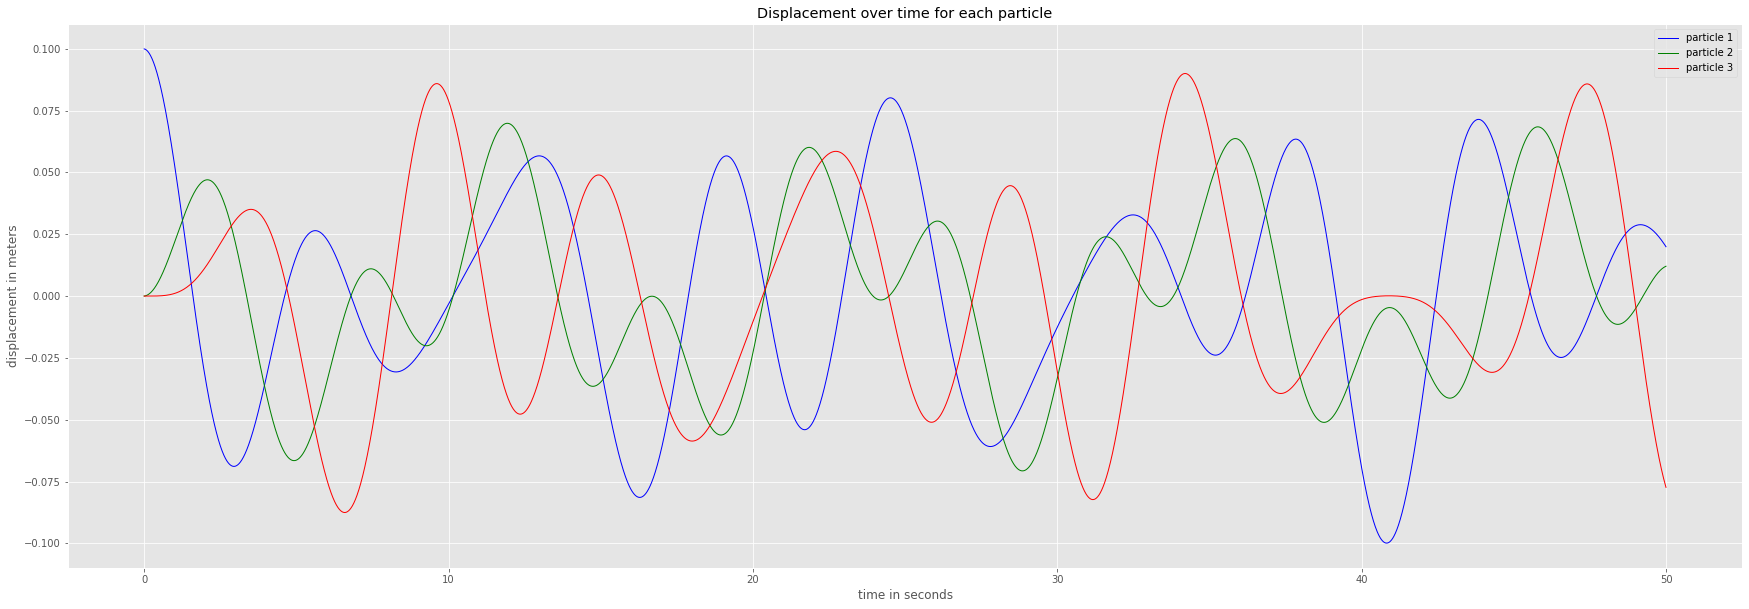

In [18]:
import matplotlib.pyplot as plt 

#converting to numpy arrays

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
v1 = np.array(v1)
v2 = np.array(v2)
v3 = np.array(v3)

#generating the plot for displacement over time

plt.figure(figsize=(30,10))
plt.title("Displacement over time for each particle")
plt.plot(t_s , x1[2:] , linewidth = 1 ,color = 'b' )
plt.plot(t_s , x2[2:] ,linewidth = 1 , color = 'g' )
plt.plot(t_s , x3[2:] , linewidth = 1 ,color = 'r')
plt.xlabel("time in seconds")
plt.ylabel("displacement in meters")
plt.legend(['particle 1' , 'particle 2' , 'particle 3'])

plt.show()

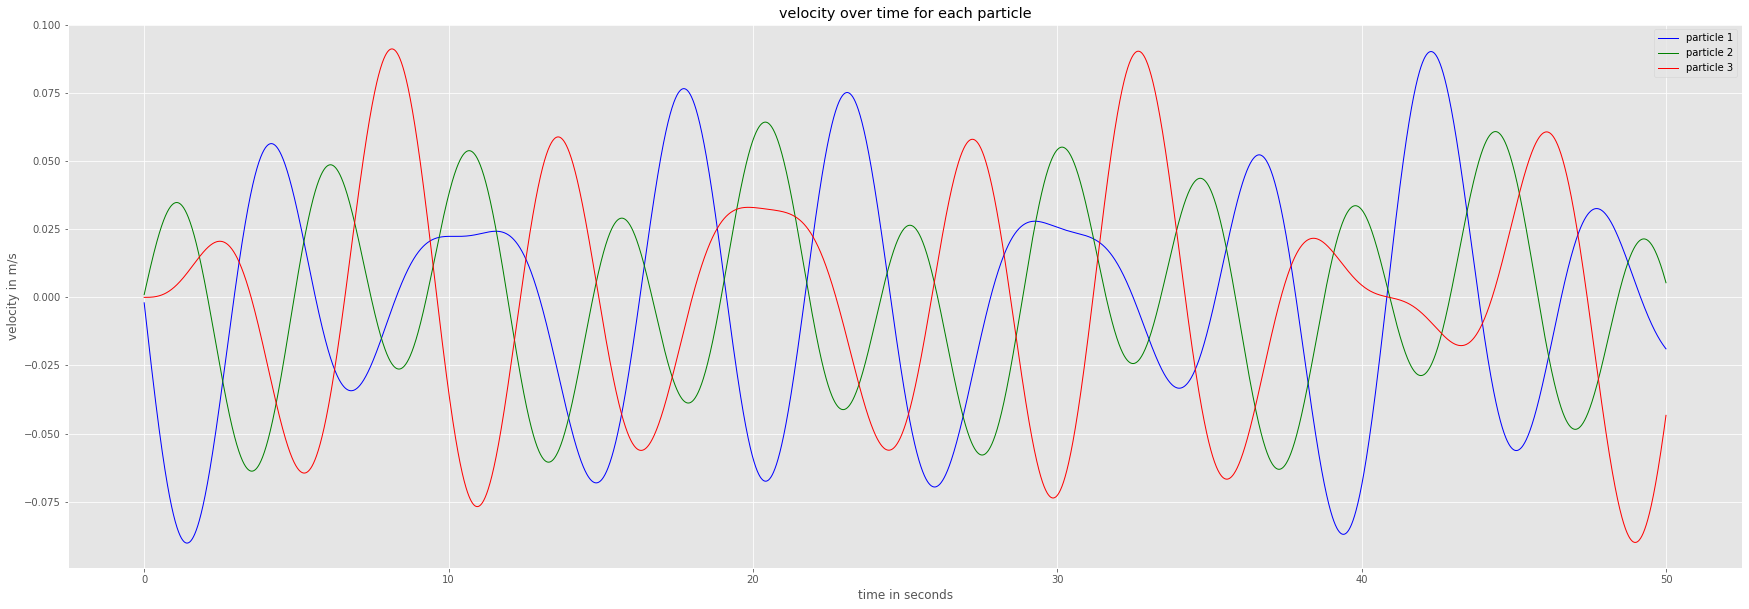

In [19]:
plt.figure(figsize=(30,10))
plt.title("velocity over time for each particle")
plt.plot(t_s , v1[2:] , linewidth = 1 ,color = 'b' )
plt.plot(t_s , v2[2:] ,linewidth = 1 , color = 'g' )
plt.plot(t_s , v3[2:] , linewidth = 1 ,color = 'r')
plt.xlabel("time in seconds")
plt.ylabel("velocity in m/s")
plt.legend(['particle 1' , 'particle 2' , 'particle 3'])

plt.show()

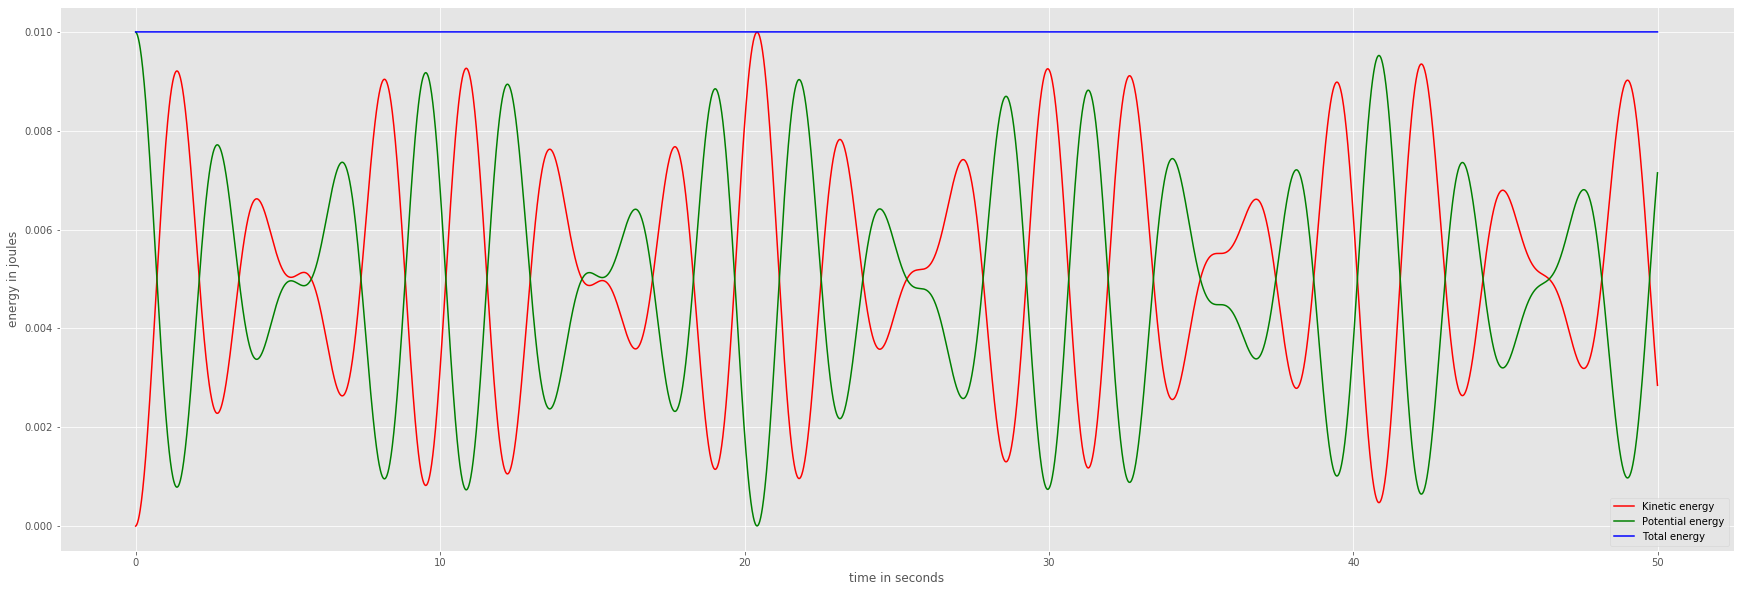

In [21]:

#attempt at plotting the ke te and pe of the system , failed total energy is not conservered idk why 

plt.figure(figsize=(30,10))
plt.plot(t_s , KE[1:] , color = 'r' )
plt.plot(t_s, PE[1:] , color = 'g')
plt.plot(t_s, TE[1:] , color = 'b')
plt.xlabel("time in seconds")
plt.ylabel("energy in joules")
plt.legend(["Kinetic energy" , "Potential energy" , "Total energy"])                                                                      